In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline
 


In [6]:
#Load the dataset 
data = pd.read_csv("Titanic_train.csv")
data.shape 
#data = pd.read_csv("D:\DR\DataAnalysis code\wine.csv")
#print(data['Wine'].value_counts())
#data 

(891, 12)

## Principal Component Analysis

In [7]:
# Drop non-numeric columns and columns with missing values
numeric_columns = data.select_dtypes(include=['number']).columns
titanic_numeric = data[numeric_columns].dropna()

In [8]:
# Standardize the data
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic_numeric)

In [9]:
# Apply PCA
pca = PCA(n_components=2)  # We choose to reduce to 2 components for visualization
titanic_pca = pca.fit_transform(titanic_scaled)

In [10]:
# Create a new DataFrame with PCA components
pca_df = pd.DataFrame(data=titanic_pca, columns=['PC1', 'PC2'])

In [11]:
# Add target variable (e.g., survived)
pca_df['Survived'] = titanic_numeric['Survived']

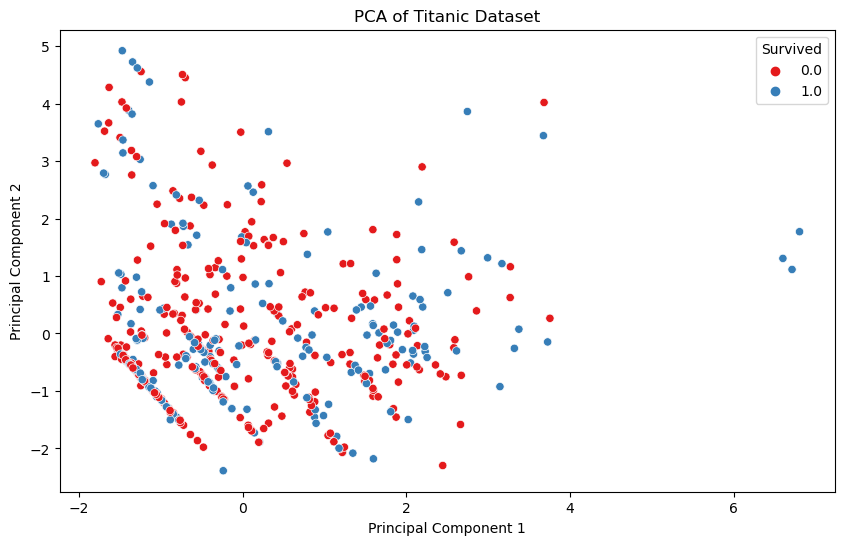

In [12]:
# Visualize PCA components
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Survived', data=pca_df, palette='Set1')
plt.title('PCA of Titanic Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Survived', loc='upper right')
plt.show()

# Making a heatmap with the default parameters. We will be creating a 10×10 2-D data using the randint() function of the NumPy module.

The data to be plotted:

[[71 88 19 46 23 51 29 73 75 80]
 [ 4 89 35 50 34 46 26 29  3 70]
 [44 90 22 89 56 22 87 45 24 30]
 [45 22 59 34 14 52 85 94  6 22]
 [14 86 81 69 64 94 64 47 66 10]
 [41 31 63 65 45 12 85 43 26 50]
 [54 89 41 33 82 19 16 69 62 21]
 [ 4  4 85 67 41 61 73 21 42 91]
 [90 10 23 94 40 94 77 86 72 62]
 [38 50 23 92 46 23  1 33 27 69]]


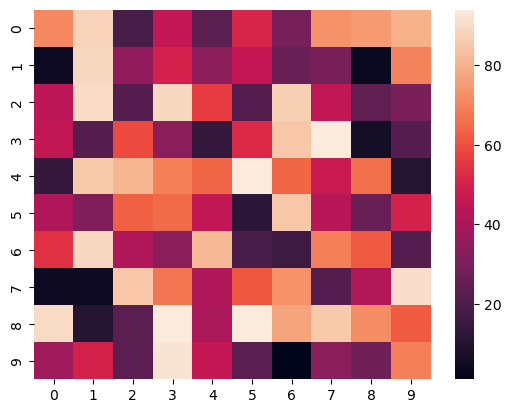

In [1]:
# importing the modules 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 
  
# generating 2-D 10x10 matrix of random numbers 
# from 1 to 100 
data = np.random.randint(low = 1, high = 100, size = (10, 10)) 
print("The data to be plotted:\n") 
print(data) 
  
# plotting the heatmap 
hm = sn.heatmap(data = data) 
  
# displaying the plotted heatmap 
plt.show()

looking at the cmap parameter. Matplotlib provides us with multiple colormaps, you can look at all of them here. In our example, we’ll be using tab20.

Centering the cmap to 0 by passing the center parameter as 0.

 


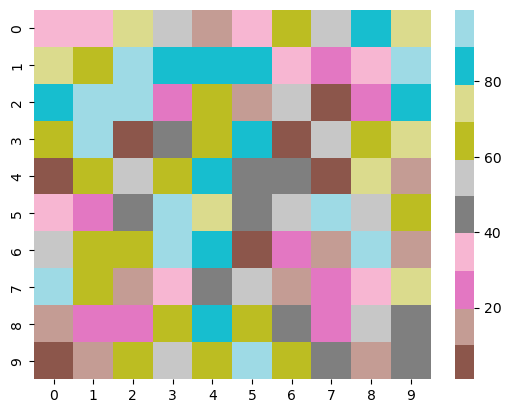

In [3]:
# importing the modules 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 

# generating 2-D 10x10 matrix of random numbers 
# from 1 to 100 
data = np.random.randint(low=1, 
						high=100, 
						size=(10, 10)) 

# setting the parameter values 
cmap = "tab20"
center = 0

# plotting the heatmap 
hm = sn.heatmap(data=data, 
				cmap=cmap, 
				center=center) 

# displaying the plotted heatmap 
plt.show() 


## Recursive Feature Elimination

In [11]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Titanic dataset (assuming it's stored as a CSV file named 'titanic.csv')
titanic_data = pd.read_csv('Titanic_train.csv')

# Preprocessing: Convert categorical variables into numerical
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'])

# Drop unnecessary columns or columns that can't be used for prediction
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Handle missing values
titanic_data.fillna(titanic_data.mean(), inplace=True)

# Split data into features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base model
model = RandomForestClassifier(random_state=42)

# Create the RFE model and select 5 attributes
rfe = RFE(model, n_features_to_select=5)

# Fit the RFE model to the training data
rfe.fit(X_train, y_train)

# Print the selected features
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

# Evaluate the model using selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

model.fit(X_train_selected, y_train)
predictions = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy with selected features:", accuracy)


Selected features: Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male'], dtype='object')
Accuracy with selected features: 0.7932960893854749


## Feature Selection using Filter based methods
1. Pearson Correlation
2. Chi squared
3. Mutual Information Gain
4. Selecting K best features

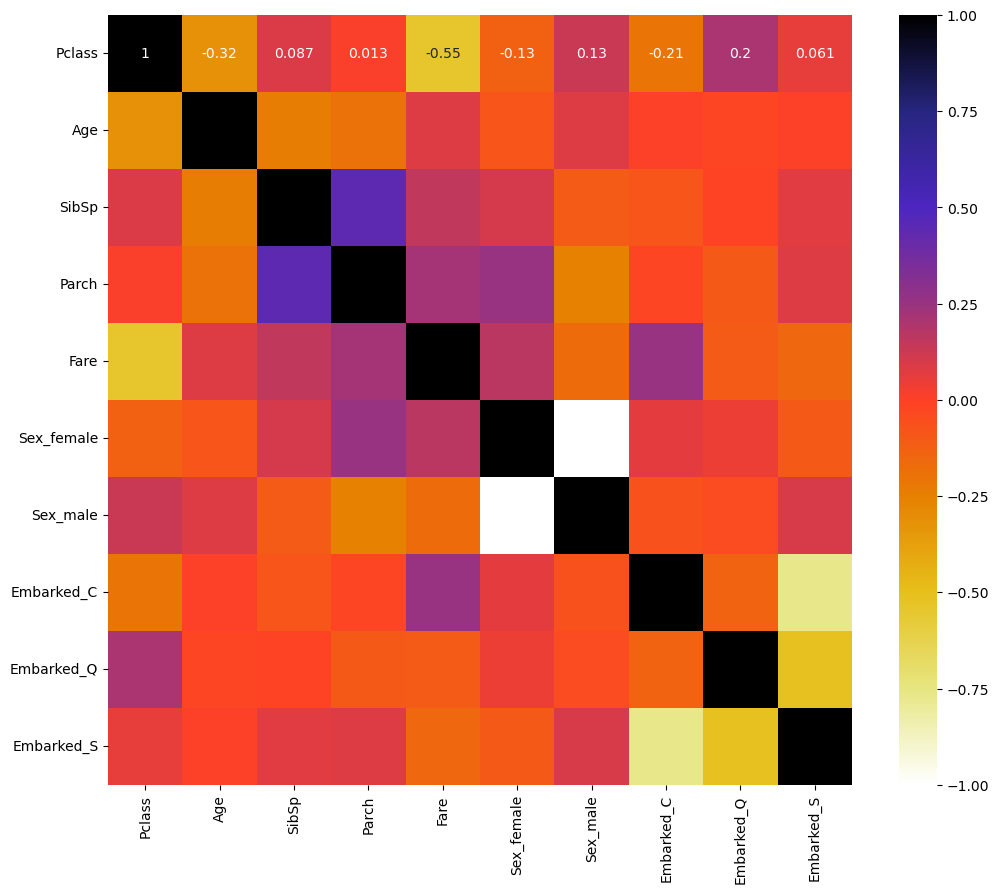

In [13]:
# Using Pearson Correlation
### Unsupervised
import seaborn as sns
cor = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()


In [32]:
# Finding the correlated features
def correlation(dataset, threshold):
    corr_pairs = tuple() 
    all_pairs = []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                print(abs(corr_matrix.iloc[i, j]))
                corr_pairs = (corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])  
                all_pairs.append(corr_pairs)
    return all_pairs  

In [33]:
# Which features have maximum correlation?
# Default = 0.85
corr_feature_pairs = correlation(X_train, 0.6)
corr_feature_pairs

1.0
0.7732052680256163


[('Sex_male', 'Sex_female', -1.0),
 ('Embarked_S', 'Embarked_C', -0.7732052680256163)]

In [34]:
corr_features = ['Parch', 'Fare']

In [35]:
print(X_train.shape)
print(X_test.shape)

(712, 10)
(179, 10)


In [36]:
# Removing correlated features
print(X_train.shape)
print(X_test.shape)
X_train.drop(corr_features,axis=1) # inplace=True)
X_test.drop(corr_features,axis=1) # inplace=True)
print(X_train.shape)
print(X_test.shape)

(712, 10)
(179, 10)
(712, 10)
(179, 10)


In [22]:
# (B) Chi-square
# Perform chi2 test
## Supervised method
from sklearn.feature_selection import chi2
# Calculating Fscore and p value
f_p_values=chi2(X_train,y_train)
f_p_values

(array([2.14788625e+01, 1.22823512e+01, 4.02913953e+00, 7.20641836e+00,
        3.58477807e+03, 1.37061416e+02, 7.19058821e+01, 1.49581186e+01,
        2.42391645e-02, 3.79041959e+00]),
 array([3.57750429e-06, 4.57261921e-04, 4.47207448e-02, 7.26433168e-03,
        0.00000000e+00, 1.16912602e-31, 2.25710127e-17, 1.09924062e-04,
        8.76277915e-01, 5.15467253e-02]))

The chi-square (χ²) function is a statistical measure used to compare observed data with expected data. It's particularly useful in hypothesis testing and assessing the goodness-of-fit of a model to observed data.

In general, the formula for the chi-square statistic is:

χ² = Σ((O - E)² / E)

Where:

χ² is the chi-square statistic.
O is the observed frequency.
E is the expected frequency.
Σ denotes the sum over all categories or cells.
The chi-square test is often used to determine whether there is a significant association between two categorical variables. It compares observed frequencies to expected frequencies under the assumption of independence between the variables. If the observed frequencies significantly differ from the expected frequencies, the chi-square statistic will be large, indicating that the variables are likely dependent.

The chi-square test is commonly used in fields such as biology, psychology, sociology, and market research, among others.

In [23]:
# Representing F score and the second array is for p- values in list form
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns       # setting indexes as column names 
p_values 

Pclass        3.577504e-06
Age           4.572619e-04
SibSp         4.472074e-02
Parch         7.264332e-03
Fare          0.000000e+00
Sex_female    1.169126e-31
Sex_male      2.257101e-17
Embarked_C    1.099241e-04
Embarked_Q    8.762779e-01
Embarked_S    5.154673e-02
dtype: float64

In [24]:
p_values.sort_index(ascending=False)
print(p_values)
# The upper columns are most important 
# So, lower ones can be removed

Pclass        3.577504e-06
Age           4.572619e-04
SibSp         4.472074e-02
Parch         7.264332e-03
Fare          0.000000e+00
Sex_female    1.169126e-31
Sex_male      2.257101e-17
Embarked_C    1.099241e-04
Embarked_Q    8.762779e-01
Embarked_S    5.154673e-02
dtype: float64


In [37]:
## (C) feature selection by using mutual Information Gain
# Importing mutual information gain
## Supervised
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
print(mutual_info)
print(X_train.columns)
## The higher the value the more important that feature will be or you can say that the dependency of 
## that independent feature will be more on the dependent feature.

[0.04845964 0.00997146 0.00617033 0.01697197 0.09720017 0.16521445
 0.16747838 0.00182447 0.00849937 0.        ]
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [38]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

'''
Mutual information methods can capture any kind of statistical dependency, 
but being nonparametric, they require more samples for accurate estimation.
'''

'\nMutual information methods can capture any kind of statistical dependency, \nbut being nonparametric, they require more samples for accurate estimation.\n'

<Axes: >

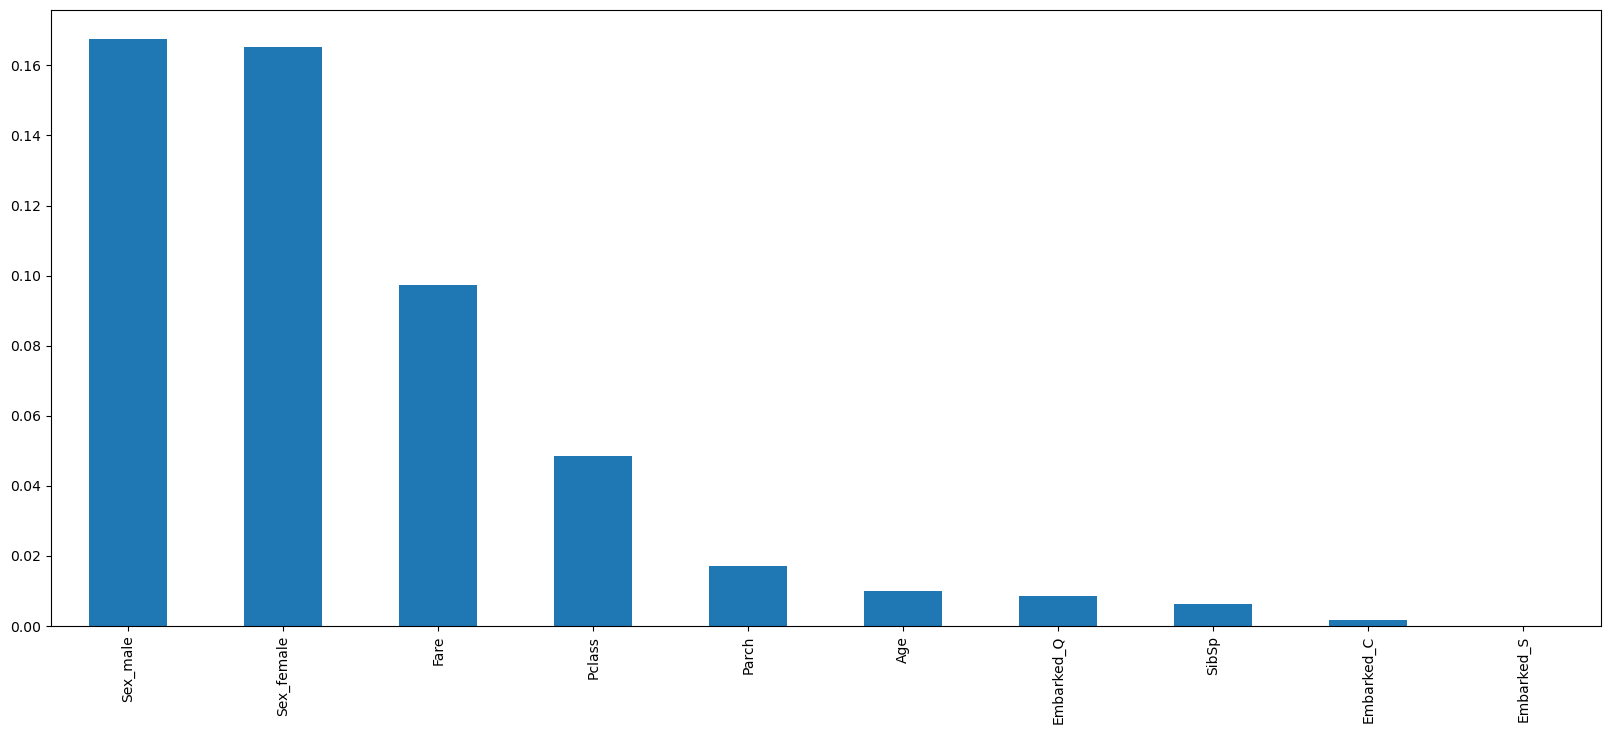

In [39]:
# plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [40]:
# Selecting k best features
from sklearn.feature_selection import SelectKBest
#No we Will select the top k important features
sel_five_cols = SelectKBest(mutual_info_classif, k=6)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_S'], dtype='object')

In [41]:
## Removing features with low variance
## As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either 
## one or zero (on or off) in more than 80% of the samples
## VAR[x] = p (1-p)
## Setting threshold .8 * (1 - .8), if features with 80% or more columns with same (0 or 1) are to be removed
from sklearn.feature_selection import VarianceThreshold
X_t = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X_t)


array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])